In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the dataset from your local system
file_path = r'datawarehouse.csv'  # Using a raw string for the file path
df = pd.read_csv(r'datawarehouse.csv', sep='\t')



# Display the first few rows
print(df.head())


        year       District  Dropout Rate (%)  Literacy Rate (%)  \
0  2021-2022      Anantapur              16.7              63.57   
1  2021-2022       Chittoor              14.5              71.53   
2  2021-2022  East Godavari              13.2              70.99   
3  2021-2022         Guntur              15.1              67.40   
4  2021-2022         Kadapa              14.8              66.70   

  Teacher-Student Ratio School Infrastructure Quality  \
0                 01:30                          Good   
1                 01:28                     Very Good   
2                 01:32                          Good   
3                 01:29                       Average   
4                 01:31                          Good   

  Average Annual Income (INR)  
0                    1,76,707  
1                    1,92,587  
2                    2,07,717  
3                    1,76,707  
4                    1,76,707  


Data Cleaning

In [3]:
# Check for duplicates in the dataset
print(f"Number of duplicate rows before: {df.duplicated().sum()}")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the number of duplicates after removal
print(f"Number of duplicate rows after: {df.duplicated().sum()}")


Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [4]:
# Clean up whitespace and standardize capitalization
df['School Infrastructure Quality'] = df['School Infrastructure Quality'].str.strip().str.title()

# Display the unique values in the column to verify
print(df['School Infrastructure Quality'].unique())


['Good' 'Very Good' 'Average']


In [5]:
# Check for any remaining missing values in the entire dataset
missing_values_report = df.isnull().sum()

# Display the missing values report
print(missing_values_report)


year                             0
District                         0
Dropout Rate (%)                 0
Literacy Rate (%)                0
Teacher-Student Ratio            0
School Infrastructure Quality    0
Average Annual Income (INR)      0
dtype: int64


In [6]:
# Display the first few rows of the cleaned dataset
print(df.head())


        year       District  Dropout Rate (%)  Literacy Rate (%)  \
0  2021-2022      Anantapur              16.7              63.57   
1  2021-2022       Chittoor              14.5              71.53   
2  2021-2022  East Godavari              13.2              70.99   
3  2021-2022         Guntur              15.1              67.40   
4  2021-2022         Kadapa              14.8              66.70   

  Teacher-Student Ratio School Infrastructure Quality  \
0                 01:30                          Good   
1                 01:28                     Very Good   
2                 01:32                          Good   
3                 01:29                       Average   
4                 01:31                          Good   

  Average Annual Income (INR)  
0                    1,76,707  
1                    1,92,587  
2                    2,07,717  
3                    1,76,707  
4                    1,76,707  


In [7]:
# Remove commas and convert the column to a numeric type
df['Average Annual Income (INR)'] = df['Average Annual Income (INR)'].str.replace(',', '').astype(float)

# Display the first few rows to verify the cleaning
print(df[['Average Annual Income (INR)']].head())


   Average Annual Income (INR)
0                     176707.0
1                     192587.0
2                     207717.0
3                     176707.0
4                     176707.0


In [8]:
# Replace categorical values with numerical values
df['School Infrastructure Quality'] = df['School Infrastructure Quality'].replace({
    'Very Good': 2,
    'Good': 1,
    'Average': 0
})

# Display the first few rows to verify the changes
print(df[['School Infrastructure Quality']].head())


   School Infrastructure Quality
0                              1
1                              2
2                              1
3                              0
4                              1


C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\2546490133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['School Infrastructure Quality'] = df['School Infrastructure Quality'].replace({


Updated dataset to a new CSV file

In [9]:
# Save the updated dataset to a new CSV file
updated_file_path = r'datawarehouse_updated.csv'
df.to_csv(updated_file_path, index=False)

print(f"Updated dataset saved to: {updated_file_path}")


Updated dataset saved to: datawarehouse_updated.csv


Normalization

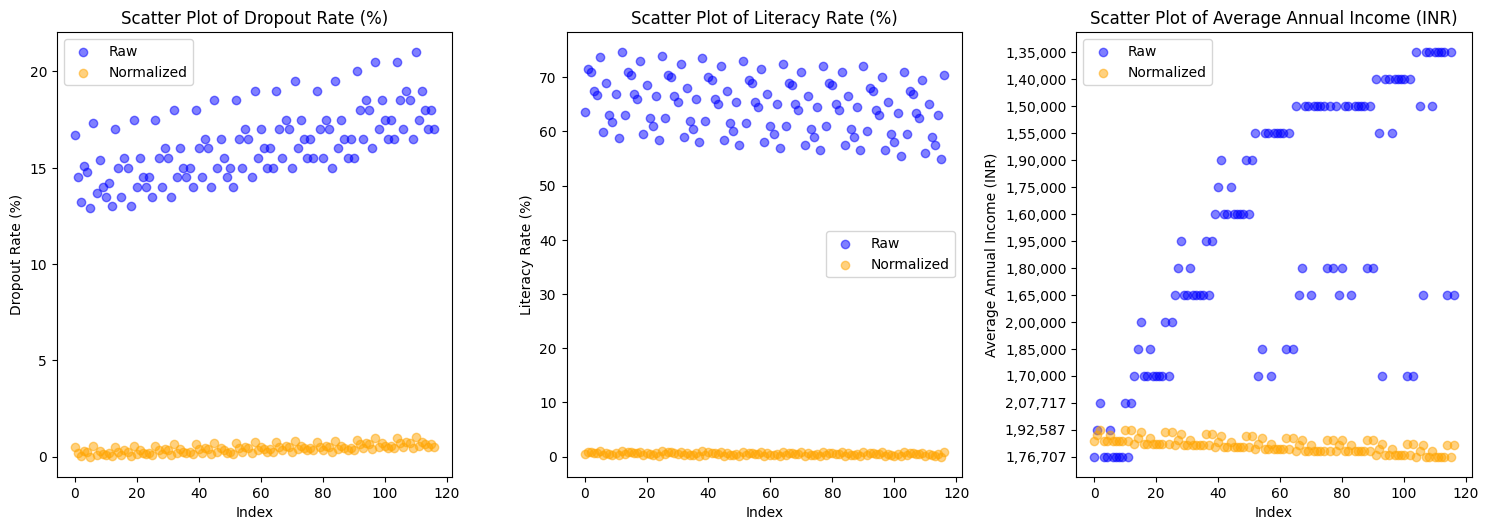

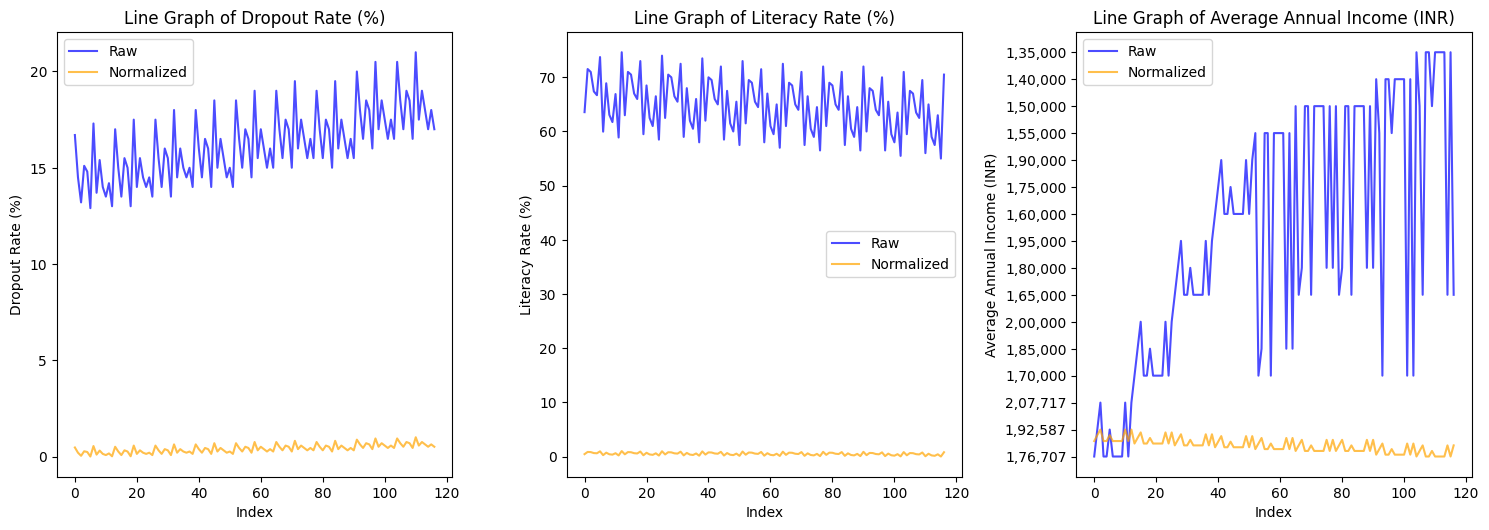

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw dataset
df_raw = pd.read_csv(r'datawarehouse.csv', sep='\t')

# Load the normalized dataset
df_normalized = pd.read_csv(r'normalized_data.csv')

# Set up the figure for scatter plots
plt.figure(figsize=(15, 10))

# Scatter plots for raw and normalized data
numeric_columns = ['Dropout Rate (%)', 'Literacy Rate (%)', 'Average Annual Income (INR)']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_raw.index, df_raw[column], label='Raw', alpha=0.5, color='blue')
    plt.scatter(df_normalized.index, df_normalized[column], label='Normalized', alpha=0.5, color='orange')
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
# Save the scatter plot image
plt.savefig('scatter_plots.png')
plt.show()

# Set up the figure for line graphs
plt.figure(figsize=(15, 10))

# Line graphs for raw and normalized data
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.plot(df_raw.index, df_raw[column], label='Raw', alpha=0.7, color='blue')
    plt.plot(df_normalized.index, df_normalized[column], label='Normalized', alpha=0.7, color='orange')
    plt.title(f'Line Graph of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
# Save the line graph image
plt.savefig('line_graphs.png')
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv', sep='\t')


# Data Cleaning: Convert 'Average Annual Income (INR)' to numeric
df['Average Annual Income (INR)'] = pd.to_numeric(df['Average Annual Income (INR)'].str.replace(',', ''), errors='coerce')

# Select numeric columns for normalization
numeric_columns = ['Dropout Rate (%)', 'Literacy Rate (%)', 'Average Annual Income (INR)']

# Initialize the MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()

# Perform normalization and replace the original values with the normalized ones
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to verify normalization
print("Normalized Data:")
print(df[numeric_columns].head())


Normalized Data:
   Dropout Rate (%)  Literacy Rate (%)  Average Annual Income (INR)
0          0.469136           0.436577                     0.573552
1          0.197531           0.842078                     0.791933
2          0.037037           0.814570                     1.000000
3          0.271605           0.631686                     0.573552
4          0.234568           0.596026                     0.573552


In [12]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv')

print(df.columns)

Index(['year\tDistrict\tDropout Rate (%)\tLiteracy Rate (%)\tTeacher-Student Ratio\tSchool Infrastructure Quality\tAverage Annual Income (INR)'], dtype='object')


In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv', sep='\t')





# Data Cleaning: Convert 'Average Annual Income (INR)' to numeric
df['Average Annual Income (INR)'] = pd.to_numeric(df['Average Annual Income (INR)'].str.replace(',', ''), errors='coerce')

# Select numeric columns for normalization
numeric_columns = ['Dropout Rate (%)', 'Literacy Rate (%)', 'Average Annual Income (INR)']

# Initialize the MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()

# Perform normalization and replace the original values with the normalized ones
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to verify normalization
print("Normalized Data:")
print(df[numeric_columns].head())

# Save the modified DataFrame to a new CSV file
output_file_path = r'normalized_data.csv'
df.to_csv(output_file_path, index=False)

print(f"Modified data saved to: {output_file_path}")


Normalized Data:
   Dropout Rate (%)  Literacy Rate (%)  Average Annual Income (INR)
0          0.469136           0.436577                     0.573552
1          0.197531           0.842078                     0.791933
2          0.037037           0.814570                     1.000000
3          0.271605           0.631686                     0.573552
4          0.234568           0.596026                     0.573552
Modified data saved to: normalized_data.csv


In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv', sep='\t')


# Data Cleaning: Convert 'Average Annual Income (INR)' to numeric
df['Average Annual Income (INR)'] = pd.to_numeric(df['Average Annual Income (INR)'].str.replace(',', ''), errors='coerce')

# Select numeric columns for normalization
numeric_columns = ['Dropout Rate (%)', 'Literacy Rate (%)', 'Average Annual Income (INR)']

# Initialize the MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()

# Perform normalization and replace the original values with the normalized ones
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the entire DataFrame to verify normalization
print("Normalized Data:")
print(df)


Normalized Data:
          year       District  Dropout Rate (%)  Literacy Rate (%)  \
0    2021-2022      Anantapur          0.469136           0.436577   
1    2021-2022       Chittoor          0.197531           0.842078   
2    2021-2022  East Godavari          0.037037           0.814570   
3    2021-2022         Guntur          0.271605           0.631686   
4    2021-2022         Kadapa          0.234568           0.596026   
..         ...            ...               ...                ...   
112  2013-2014       Prakasam          0.753086           0.203770   
113  2013-2014     Srikakulam          0.629630           0.127356   
114  2013-2014  Visakhapatnam          0.506173           0.407539   
115  2013-2014   Vizianagaram          0.629630           0.000000   
116  2013-2014  West Godavari          0.506173           0.789608   

    Teacher-Student Ratio School Infrastructure Quality  \
0                   01:30                          Good   
1                   01:2

In [16]:
pip install seaborn numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Normalization Graphs

C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['School Infrastructure Quality'] = df['School Infrastructure Quality'].replace({
C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original 

   Dropout Rate (%)  Literacy Rate (%)  Average Annual Income (INR)  \
0          0.469136           0.436577                     0.573552   
1          0.197531           0.842078                     0.791933   
2          0.037037           0.814570                     1.000000   
3          0.271605           0.631686                     0.573552   
4          0.234568           0.596026                     0.573552   

   School Infrastructure Quality  
0                            0.5  
1                            1.0  
2                            0.5  
3                            0.0  
4                            0.5  


C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(df['District'], rotation=90)
C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(df['District'], rotation=90)


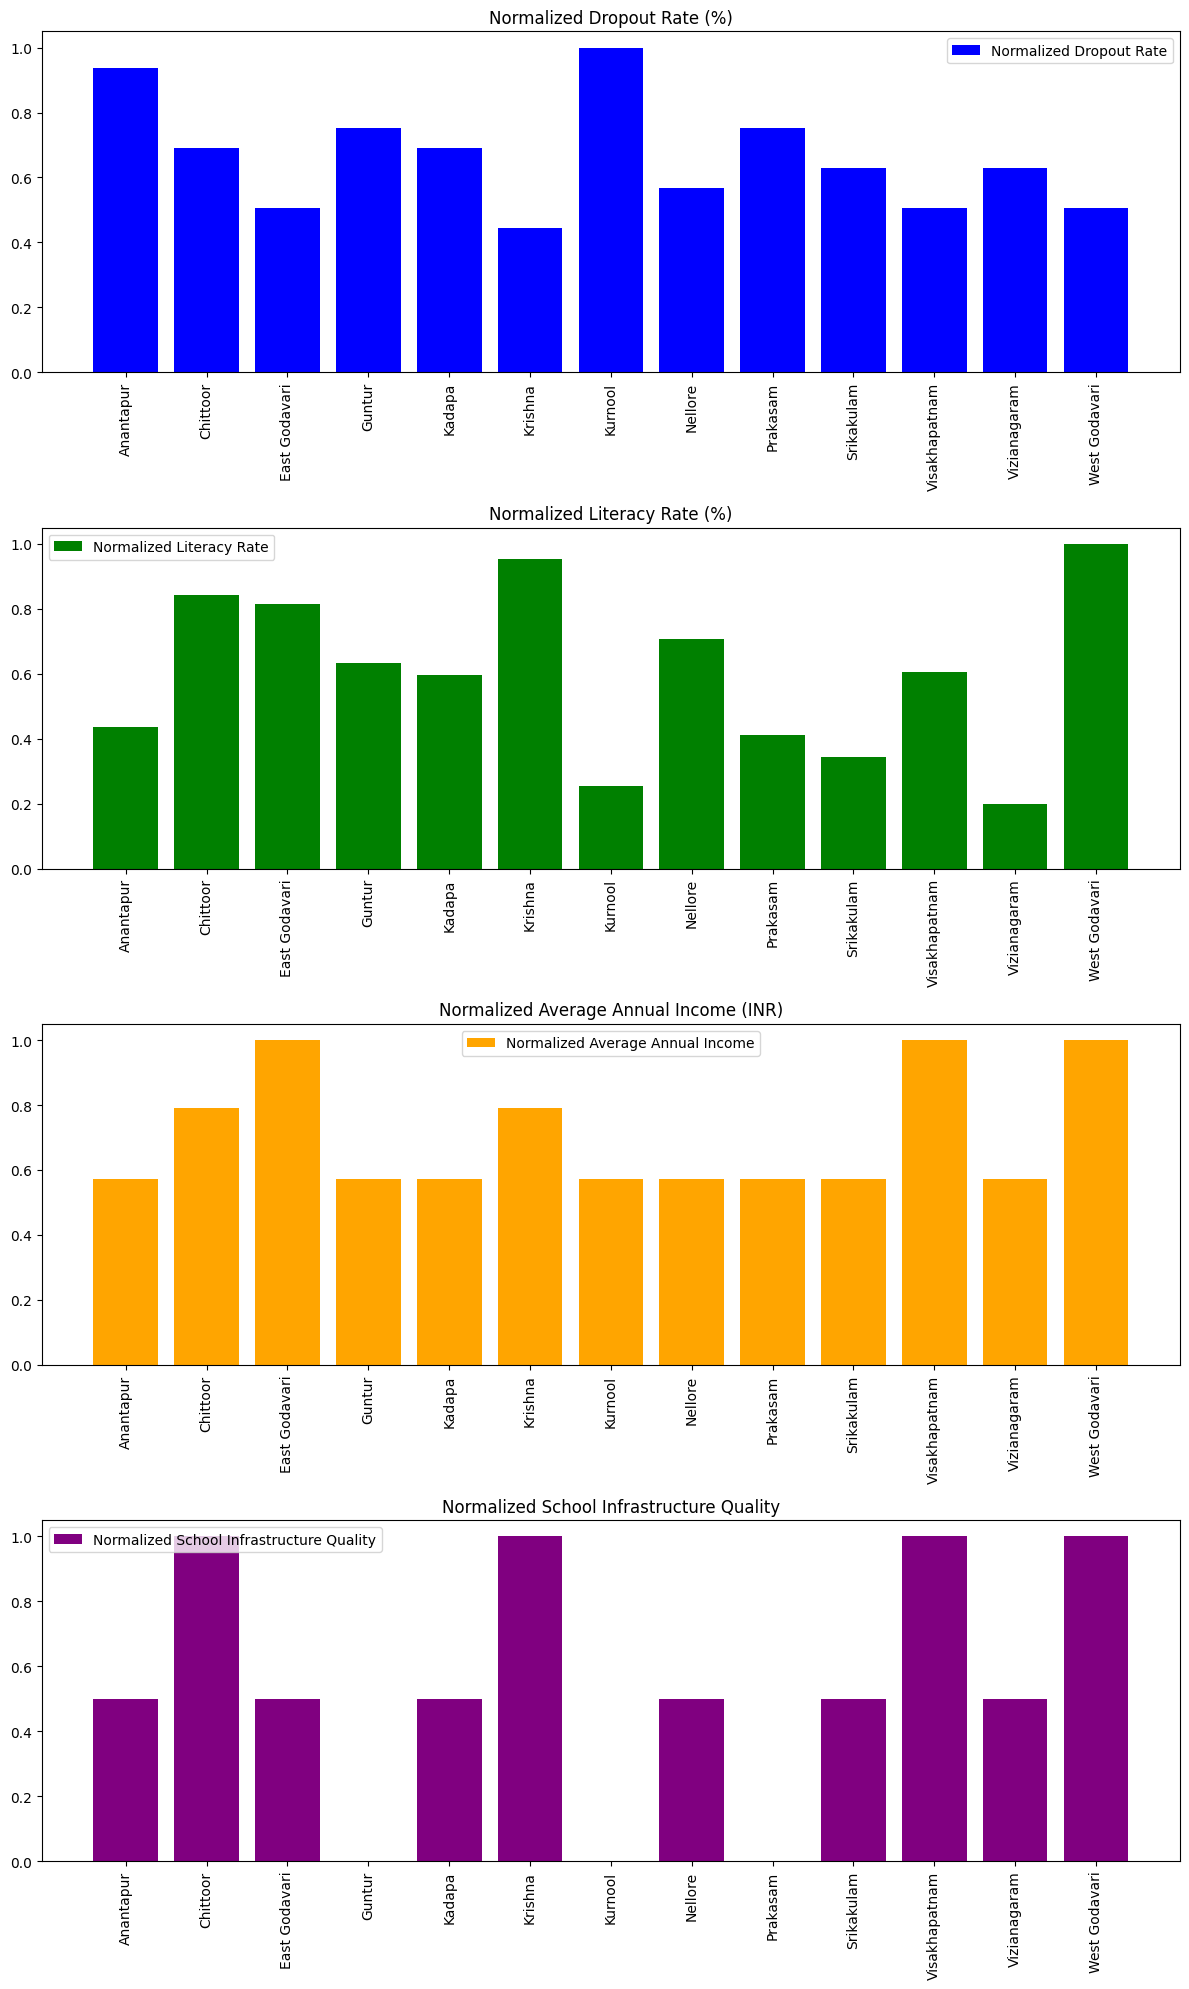

C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Dropout Rate (%)', data=df, palette='Blues')
C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Literacy Rate (%)', data=df, palette='Greens')
C:\Users\FAHEEM\AppData\Local\Temp\ipykernel_8436\1123868553.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Average Annual Income (INR)', data=df, palette='Oranges')
C:\U

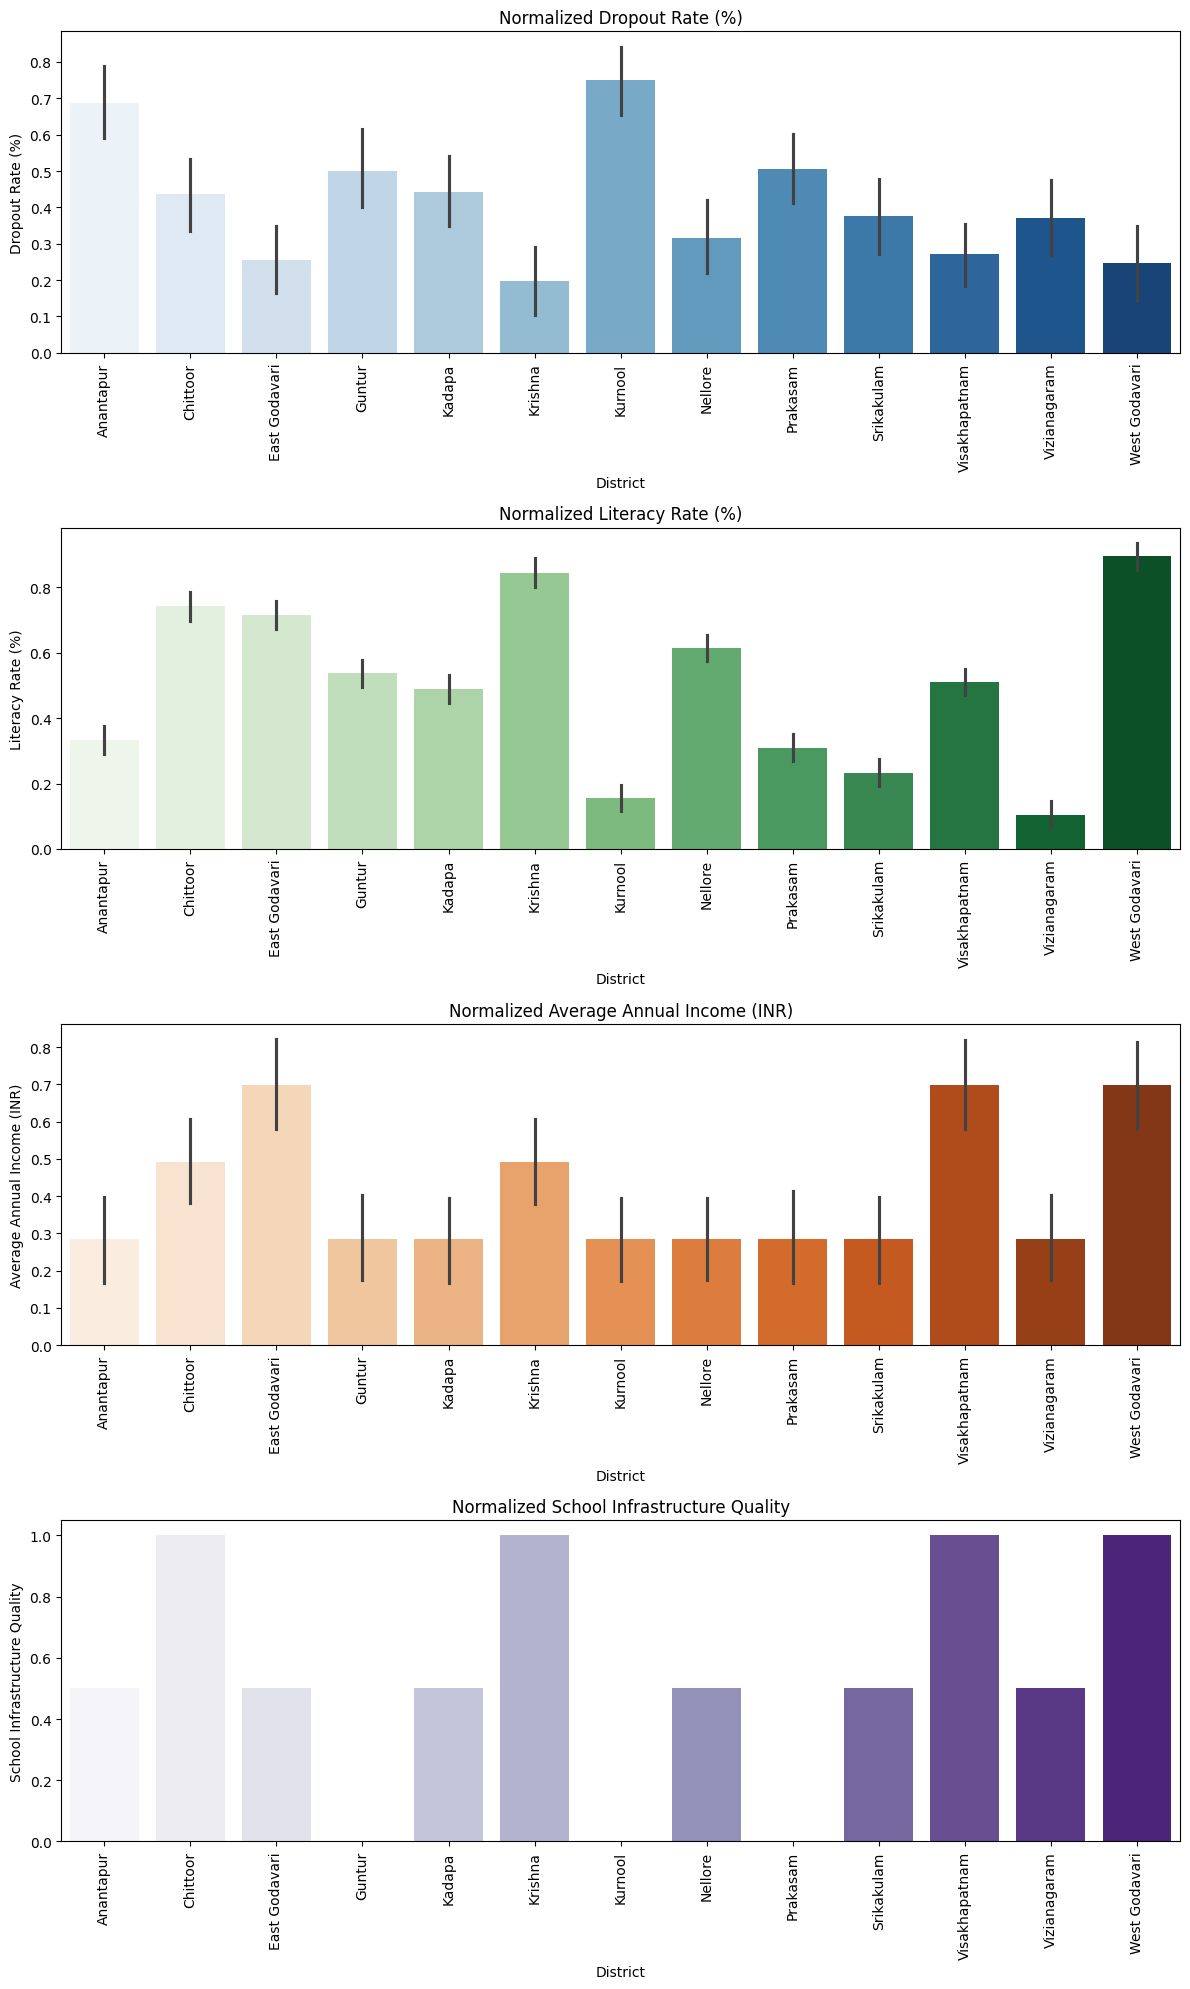

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv', sep='\t')

# Replace categorical values with numerical values
df['School Infrastructure Quality'] = df['School Infrastructure Quality'].replace({
    'Very Good': 2,
    'Good': 1,
    'Average': 0
})

# Clean the 'Average Annual Income (INR)' column
df['Average Annual Income (INR)'] = df['Average Annual Income (INR)'].str.replace(',', '')  # Remove commas
df['Average Annual Income (INR)'] = pd.to_numeric(df['Average Annual Income (INR)'], errors='coerce')  # Convert to numeric

# Check for any non-numeric values and handle them (e.g., fill NaN with mean)
df['Average Annual Income (INR)'].fillna(df['Average Annual Income (INR)'].mean(), inplace=True)

# Select numeric columns for normalization
numeric_columns = ['Dropout Rate (%)', 'Literacy Rate (%)', 'Average Annual Income (INR)', 'School Infrastructure Quality']

# Initialize the MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()

# Perform normalization and replace the original values with the normalized ones
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to verify normalization
print(df[numeric_columns].head())

# Create subplots for normalized data using Matplotlib
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# 1. Normalized Dropout Rate
ax[0].bar(df['District'], df['Dropout Rate (%)'], label='Normalized Dropout Rate', color='blue')
ax[0].set_title('Normalized Dropout Rate (%)')
ax[0].set_xticklabels(df['District'], rotation=90)
ax[0].legend()

# 2. Normalized Literacy Rate
ax[1].bar(df['District'], df['Literacy Rate (%)'], label='Normalized Literacy Rate', color='green')
ax[1].set_title('Normalized Literacy Rate (%)')
ax[1].set_xticklabels(df['District'], rotation=90)
ax[1].legend()

# 3. Normalized Average Annual Income
ax[2].bar(df['District'], df['Average Annual Income (INR)'], label='Normalized Average Annual Income', color='orange')
ax[2].set_title('Normalized Average Annual Income (INR)')
ax[2].set_xticklabels(df['District'], rotation=90)
ax[2].legend()

# 4. Normalized School Infrastructure Quality
ax[3].bar(df['District'], df['School Infrastructure Quality'], label='Normalized School Infrastructure Quality', color='purple')
ax[3].set_title('Normalized School Infrastructure Quality')
ax[3].set_xticklabels(df['District'], rotation=90)
ax[3].legend()

# Show the plots
plt.tight_layout()

# Save the Matplotlib plots as .jpg
plt.savefig('normalized_data_plots.jpg', format='jpg')
plt.show()

# Create Seaborn plots for comparison
plt.figure(figsize=(12, 20))

# 1. Seaborn: Normalized Dropout Rate
plt.subplot(4, 1, 1)
sns.barplot(x='District', y='Dropout Rate (%)', data=df, palette='Blues')
plt.title('Normalized Dropout Rate (%)')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('dropout_rate_plot.jpg', format='jpg')

# 2. Seaborn: Normalized Literacy Rate
plt.subplot(4, 1, 2)
sns.barplot(x='District', y='Literacy Rate (%)', data=df, palette='Greens')
plt.title('Normalized Literacy Rate (%)')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('literacy_rate_plot.jpg', format='jpg')

# 3. Seaborn: Normalized Average Annual Income
plt.subplot(4, 1, 3)
sns.barplot(x='District', y='Average Annual Income (INR)', data=df, palette='Oranges')
plt.title('Normalized Average Annual Income (INR)')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('average_annual_income_plot.jpg', format='jpg')

# 4. Seaborn: Normalized School Infrastructure Quality
plt.subplot(4, 1, 4)
sns.barplot(x='District', y='School Infrastructure Quality', data=df, palette='Purples')
plt.title('Normalized School Infrastructure Quality')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('school_infrastructure_plot.jpg', format='jpg')

# Show the Seaborn plots
plt.tight_layout()
plt.show()


Co-relation Graphs

Hypothesis Test

In [18]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


H2 - Correlation: -0.6199767665123386, p-value: 9.085579727325383e-14
H2 is TRUE: Higher literacy rates are significantly associated with lower dropout rates.


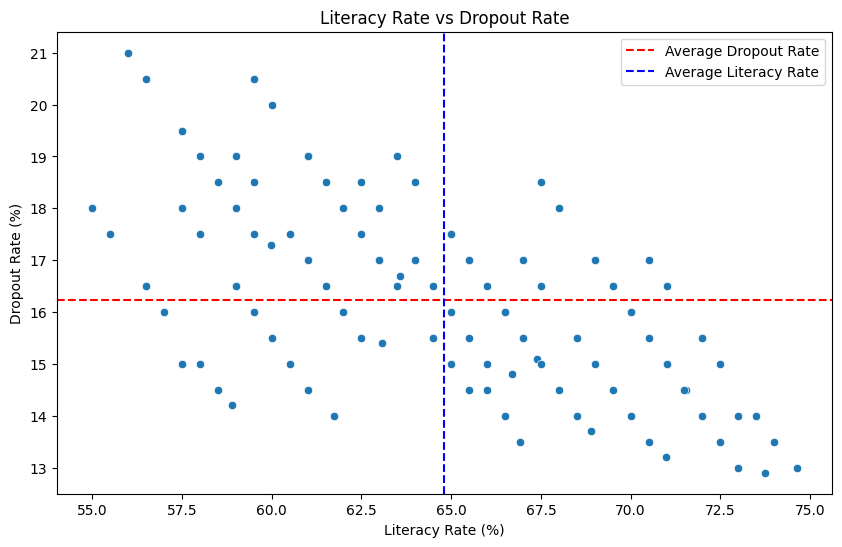

H4 - Correlation: 0.7513806384512088, p-value: 1.6967184982964797e-22
H4 is TRUE: A higher teacher-student ratio is significantly associated with decreased dropout rates.


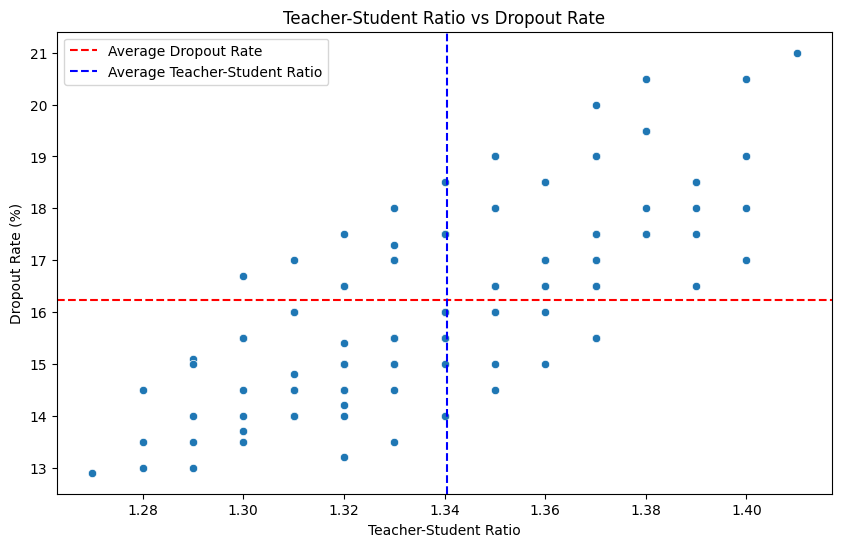

H5 - Correlation: -0.8102781264552784, p-value: 1.8715341026565318e-28
H5 is TRUE: Higher average annual income is significantly correlated with lower dropout rates.


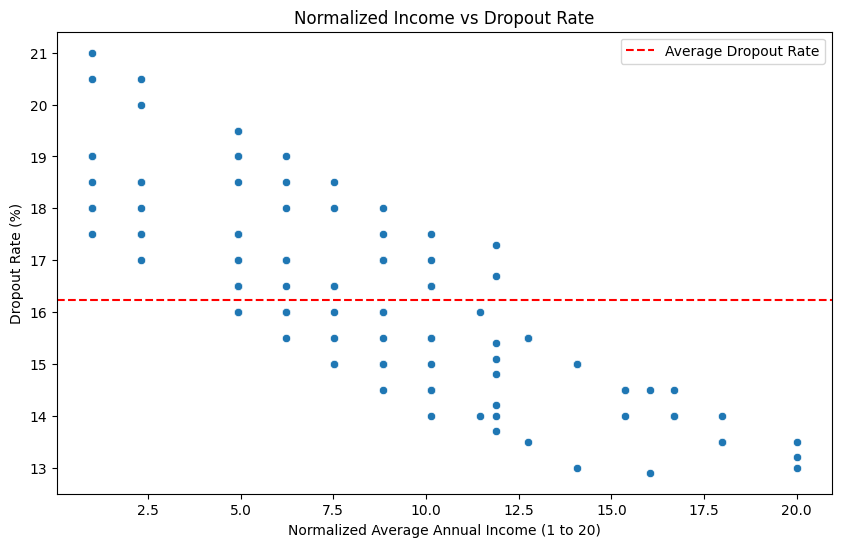

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your data into a DataFrame
df = pd.read_csv(r'datawarehouse.csv', sep='\t')

# Data Cleaning
# Convert columns to numeric, handling commas and other formatting issues
df['Average Annual Income (INR)'] = pd.to_numeric(df['Average Annual Income (INR)'].str.replace(',', ''), errors='coerce')
df['Teacher-Student Ratio'] = pd.to_numeric(df['Teacher-Student Ratio'].str.replace(':', '.'), errors='coerce')
df = df.dropna()  # Drop rows with missing values

# Normalize the cleaned income
def normalize_income(income_series, new_min=1, new_max=20):
    min_income = income_series.min()
    max_income = income_series.max()
    normalized_income = (income_series - min_income) / (max_income - min_income) * (new_max - new_min) + new_min
    return normalized_income

# Apply normalization
df['Normalized Average Annual Income'] = normalize_income(df['Average Annual Income (INR)'])

#  Testing Functions
def hypothesis_tests():
    # H2: Higher literacy rates in a district are associated with lower student dropout rates.
    correlation_h2, p_value_h2 = stats.pearsonr(df['Literacy Rate (%)'], df['Dropout Rate (%)'])
    print(f'H2 - Correlation: {correlation_h2}, p-value: {p_value_h2}')
    if p_value_h2 < 0.05:
        print("H2 is TRUE: Higher literacy rates are significantly associated with lower dropout rates.")
    else:
        print("H2 is FALSE: No significant association between literacHypothesisy rates and dropout rates.")
    
    # Plot for H2
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Literacy Rate (%)', y='Dropout Rate (%)')
    plt.title('Literacy Rate vs Dropout Rate')
    plt.xlabel('Literacy Rate (%)')
    plt.ylabel('Dropout Rate (%)')
    plt.axhline(y=df['Dropout Rate (%)'].mean(), color='red', linestyle='--', label='Average Dropout Rate')
    plt.axvline(x=df['Literacy Rate (%)'].mean(), color='blue', linestyle='--', label='Average Literacy Rate')
    plt.legend()
    plt.savefig('Literacy_Rate_vs_Dropout_Rate.jpg')
    plt.show()

 

    # H4: A higher teacher-student ratio correlates with decreased dropout rates.
    correlation_h4, p_value_h4 = stats.pearsonr(df['Teacher-Student Ratio'], df['Dropout Rate (%)'])
    print(f'H4 - Correlation: {correlation_h4}, p-value: {p_value_h4}')
    if p_value_h4 < 0.05:
        print("H4 is TRUE: A higher teacher-student ratio is significantly associated with decreased dropout rates.")
    else:
        print("H4 is FALSE: No significant correlation between teacher-student ratio and dropout rates.")
    
    # Plot for H4
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Teacher-Student Ratio', y='Dropout Rate (%)')
    plt.title('Teacher-Student Ratio vs Dropout Rate')
    plt.xlabel('Teacher-Student Ratio')
    plt.ylabel('Dropout Rate (%)')
    plt.axhline(y=df['Dropout Rate (%)'].mean(), color='red', linestyle='--', label='Average Dropout Rate')
    plt.axvline(x=df['Teacher-Student Ratio'].mean(), color='blue', linestyle='--', label='Average Teacher-Student Ratio')
    plt.legend()
    plt.savefig('Teacher_Student_Ratio_vs_Dropout_Rate.jpg')
    plt.show()

    # H5: Increased average annual income in a district is negatively correlated with student dropout rates.
    correlation_h5, p_value_h5 = stats.pearsonr(df['Normalized Average Annual Income'], df['Dropout Rate (%)'])
    print(f'H5 - Correlation: {correlation_h5}, p-value: {p_value_h5}')
    if p_value_h5 < 0.05:
        print("H5 is TRUE: Higher average annual income is significantly correlated with lower dropout rates.")
    else:
        print("H5 is FALSE: No significant correlation between income levels and dropout rates.")
    
    # Plot for H5
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Normalized Average Annual Income', y='Dropout Rate (%)')
    plt.title('Normalized Income vs Dropout Rate')
    plt.xlabel('Normalized Average Annual Income (1 to 20)')
    plt.ylabel('Dropout Rate (%)')
    plt.axhline(y=df['Dropout Rate (%)'].mean(), color='red', linestyle='--', label='Average Dropout Rate')
    plt.legend()
    plt.savefig('Income_vs_Dropout_Rate.jpg')
    plt.show()

# Run hypothesis tests visualizations
hypothesis_tests()


In [20]:
pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Co-relation Graph

Time-Analysis Graph

In [21]:
pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


year           20132014  20142015  20152016  20162017  20172018  20182019  \
District                                                                    
Anantapur      0.938272  0.876543  0.753086  0.753086  0.691358  0.629630   
Chittoor       0.691358  0.629630  0.506173  0.506173  0.444444  0.382716   
East Godavari  0.506173  0.444444  0.320988  0.320988  0.259259  0.197531   
Guntur         0.753086  0.691358  0.567901  0.567901  0.506173  0.444444   
Kadapa         0.691358  0.629630  0.506173  0.506173  0.444444  0.382716   
Krishna        0.444444  0.382716  0.259259  0.259259  0.197531  0.135802   
Kurnool        1.000000  0.938272  0.814815  0.814815  0.753086  0.691358   
Nellore        0.567901  0.506173  0.382716  0.382716  0.320988  0.259259   
Prakasam       0.753086  0.691358  0.567901  0.567901  0.506173  0.444444   
Srikakulam     0.629630  0.567901  0.444444  0.444444  0.382716  0.320988   
Visakhapatnam  0.506173  0.444444  0.320988  0.320988  0.259259  0.197531   

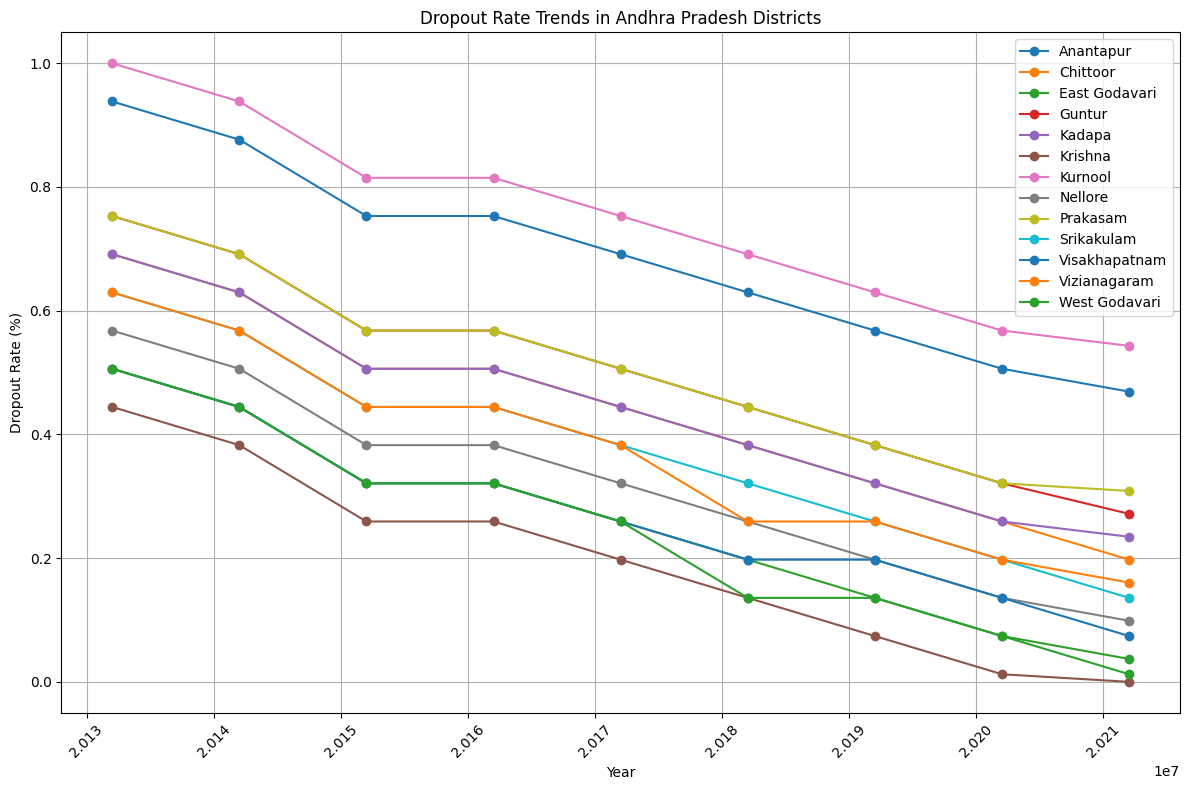

Dropout Rates for each Year and District:
year       20132014  20142015  20152016  20162017  20172018  20182019  \
District                                                                
Anantapur  0.938272  0.876543  0.753086  0.753086  0.691358   0.62963   

year       20192020  20202021  20212022  
District                                 
Anantapur  0.567901  0.506173  0.469136  
Dropout Rates for each Year and District:
year      20132014  20142015  20152016  20162017  20172018  20182019  \
District                                                               
Chittoor  0.691358   0.62963  0.506173  0.506173  0.444444  0.382716   

year      20192020  20202021  20212022  
District                                
Chittoor  0.320988  0.259259  0.197531  
Dropout Rates for each Year and District:
year           20132014  20142015  20152016  20162017  20172018  20182019  \
District                                                                    
East Godavari  0.506173  0.444444 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv(r'normalized_data.csv')

# Ensure the 'year' column is treated as numeric
df['year'] = pd.to_numeric(df['year'].str.replace('-', ''), errors='coerce')

# Ensure the 'Dropout Rate (%)' column is treated as numeric
df['Dropout Rate (%)'] = pd.to_numeric(df['Dropout Rate (%)'], errors='coerce')

# Drop rows with NaN values in 'year' or 'Dropout Rate (%)'
df.dropna(subset=['year', 'Dropout Rate (%)'], inplace=True)

# Sort the data by 'year' and 'District'
df.sort_values(by=['District', 'year'], inplace=True)

# Pivot the data to show dropout rates by district and year
dropout_rates_table = df.pivot_table(index='District', columns='year', values='Dropout Rate (%)')

# Display the table
print(dropout_rates_table)

# Unique districts in the dataset
districts = df['District'].unique()

# Create the plot
plt.figure(figsize=(12, 8))

for district in districts:
    district_data = df[df['District'] == district]
    plt.plot(district_data['year'], district_data['Dropout Rate (%)'], marker='o', label=district)

plt.title('Dropout Rate Trends in Andhra Pradesh Districts')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.savefig('Dropout_Rate_Trends.png')  # Save the plot as a PNG file
plt.show()

# Loop through each district
for district in districts:
    district_data = df[df['District'] == district]
    dropout_rates_table = district_data.pivot_table(index='District', columns='year', values='Dropout Rate (%)')
    print(f"Dropout Rates for each Year and District:\n{dropout_rates_table}")

In [23]:
pip install pandas numpy matplotlib statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from a CSV file
data = pd.read_csv(r'normalized_data.csv')  # Replace with your actual CSV file path

# Check the structure of the dataset
print(data.head())

# Split the dataset into training and testing sets (80-20 ratio)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing sets to separate CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Training and testing datasets have been saved as 'train_data.csv' and 'test_data.csv'.")


        year       District  Dropout Rate (%)  Literacy Rate (%)  \
0  2021-2022      Anantapur          0.469136           0.436577   
1  2021-2022       Chittoor          0.197531           0.842078   
2  2021-2022  East Godavari          0.037037           0.814570   
3  2021-2022         Guntur          0.271605           0.631686   
4  2021-2022         Kadapa          0.234568           0.596026   

  Teacher-Student Ratio School Infrastructure Quality  \
0                 01:30                          Good   
1                 01:28                     Very Good   
2                 01:32                          Good   
3                 01:29                       Average   
4                 01:31                          Good   

   Average Annual Income (INR)  
0                     0.573552  
1                     0.791933  
2                     1.000000  
3                     0.573552  
4                     0.573552  
Training and testing datasets have been saved as '

GradientBoostingRegressor

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import IsolationForest
import joblib 
R2=0.9253

# Load your training dataset
train_data = pd.read_csv(r'train_data.csv')  # Replace with your actual file path

# Convert 'Teacher-Student Ratio' to a numeric value
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students  # Returns the ratio as a float
    except ValueError:
        return None  # Handle any potential errors in conversion

# Preprocess training data
train_data['Teacher-Student Ratio'] = train_data['Teacher-Student Ratio'].apply(convert_ratio)
train_data['School Infrastructure Quality'] = train_data['School Infrastructure Quality'].astype('category').cat.codes

# Define features and target variable for training
X = train_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]
y = train_data['Dropout Rate (%)']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Outlier detection and removal
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_poly)
mask = outliers != -1
X_poly, y = X_poly[mask], y[mask]

# Feature selection using Recursive Feature Elimination (RFE)
model = GradientBoostingRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_poly, y)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error on Validation Data: {mse}')
print(f'R² Score on Validation Data: {R2}')

# Save the trained model
model_save_path = r'trained_model_gbr2.pkl'  # Specify where to save the model
joblib.dump(best_model, model_save_path)  # Save the model

print(f'Trained model saved to: {model_save_path}')

Mean Squared Error on Validation Data: 0.014249725865453061
R² Score on Validation Data: 0.9253
Trained model saved to: trained_model_gbr2.pkl


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import IsolationForest
import joblib


# Load your training dataset
train_data = pd.read_csv(r'train_data.csv')  # Replace with your actual file path

# Convert 'Teacher-Student Ratio' to a numeric value
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students  # Returns the ratio as a float
    except ValueError:
        return None  # Handle any potential errors in conversion

# Preprocess training data
train_data['Teacher-Student Ratio'] = train_data['Teacher-Student Ratio'].apply(convert_ratio)
train_data['School Infrastructure Quality'] = train_data['School Infrastructure Quality'].astype('category').cat.codes

# Define features and target variable for training
X = train_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]
y = train_data['Dropout Rate (%)']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Outlier detection and removal
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_poly)
mask = outliers != -1
X_poly, y = X_poly[mask], y[mask]

# Feature selection using Recursive Feature Elimination (RFE)
model = GradientBoostingRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_poly, y)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error on Validation Data: {mse}')
print(f'Mean Absolute Error on Validation Data: {mae}')
print(f'R² Score on Validation Data: {r2}')

# Save the trained model
model_save_path = r'trained_model_gbr2.pkl'  # Specify where to save the model
joblib.dump(best_model, model_save_path)  # Save the model

print(f'Trained model saved to: {model_save_path}')


Mean Squared Error on Validation Data: 0.01181334016288107
Mean Absolute Error on Validation Data: 0.09283956408902055
R² Score on Validation Data: 0.9253
Trained model saved to: trained_model_gbr2.pkl


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import IsolationForest
import joblib


# Utility function to convert teacher-student ratios to numeric values
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students
    except (ValueError, AttributeError):
        return np.nan  # Return NaN for invalid or missing data


# Preprocessing function
def preprocess_data(data):
    # Convert teacher-student ratio to numeric
    data['Teacher-Student Ratio'] = data['Teacher-Student Ratio'].apply(convert_ratio)
    
    # Encode categorical features
    data['School Infrastructure Quality'] = data['School Infrastructure Quality'].astype('category').cat.codes
    
    # Drop rows with missing values
    data.dropna(inplace=True)
    return data


# Load the dataset
train_data = pd.read_csv(r'train_data.csv')  # Replace with your file path

# Preprocess the dataset
train_data = preprocess_data(train_data)

# Define features and target variable
X = train_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]
y = train_data['Dropout Rate (%)']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features (degree 3 for complex interactions)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Detect and remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # Reduced contamination
outliers = iso_forest.fit_predict(X_poly)
mask = outliers != -1
X_poly, y = X_poly[mask], y[mask]

# Perform feature selection using Recursive Feature Elimination (RFE)
base_model = GradientBoostingRegressor(random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_poly, y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Define Gradient Boosting Regressor and hyperparameter grid
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'subsample': [0.8, 1.0],  # To add robustness
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Save the trained model
model_save_path = r'trained_model_gbr_improved.pkl'  # Specify the save path
joblib.dump(best_model, model_save_path)

print(f"Trained model saved to: {model_save_path}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Mean Squared Error (MSE): 0.0101
Mean Absolute Error (MAE): 0.0743
R² Score: 0.7930
Trained model saved to: trained_model_gbr_improved.pkl


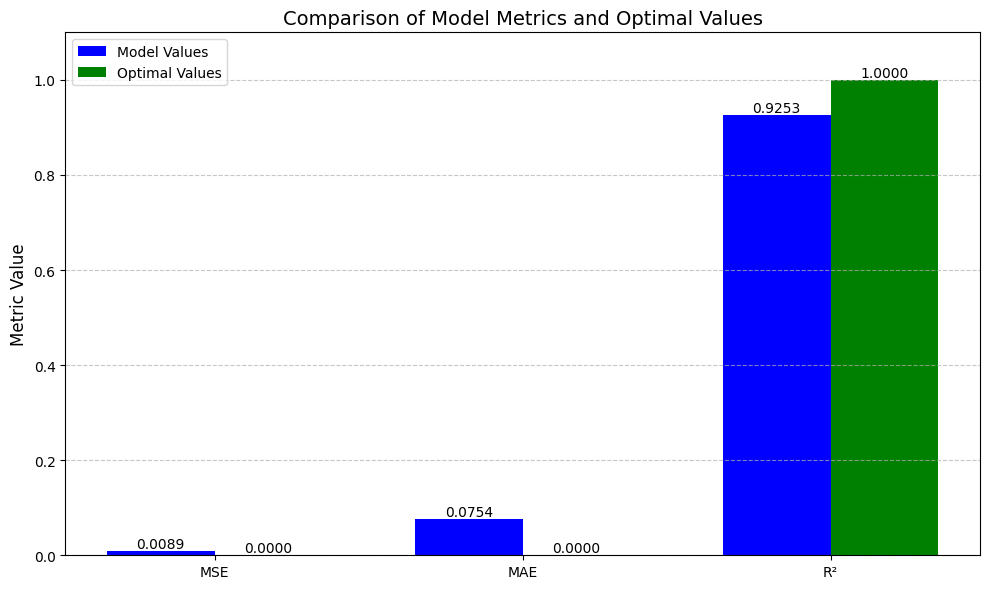

In [33]:


import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['MSE', 'MAE', 'R²']

# Model and optimal values
model_values = [0.0089, 0.0754, 0.9253]
optimal_values = [0, 0, 1]  # Replace these with actual optimal values if different

# Bar positions
x = np.arange(len(metrics))

# Bar width
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, model_values, width, label='Model Values', color='blue')
bars2 = plt.bar(x + width/2, optimal_values, width, label='Optimal Values', color='green')

# Add value annotations on top of each bar
for bars, values in zip([bars1, bars2], [model_values, optimal_values]):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# Customize plot appearance
plt.title('Comparison of Model Metrics and Optimal Values', fontsize=14)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(x, metrics)
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visualization
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor  # Changed to GradientBoostingRegressor
from sklearn.feature_selection import RFE

# Load your training dataset
train_data = pd.read_csv(r'train_data.csv')  # Replace with your actual file path

# Convert 'Teacher-Student Ratio' to a numeric value (if applicable)
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students  # Returns the ratio as a float
    except ValueError:
        return None  # Handle any potential errors in conversion

# Preprocess training data
train_data['Teacher-Student Ratio'] = train_data['Teacher-Student Ratio'].apply(convert_ratio)
train_data['School Infrastructure Quality'] = train_data['School Infrastructure Quality'].astype('category').cat.codes

# Define features for training
X = train_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]
y = train_data['Dropout Rate (%)']

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, r'scaler.pkl')

# Initialize and fit PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Save the polynomial features
joblib.dump(poly, r'poly.pkl')

# Fit the model on the entire dataset
model = GradientBoostingRegressor(random_state=42)  # Changed to GradientBoostingRegressor
model.fit(X_poly, y)  # Fit the model to the polynomial features

# Initialize and fit RFE with the fitted model
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_poly, y)

# Save the RFE
joblib.dump(rfe, r'rfe.pkl')

print('Scaler, polynomial features, and RFE saved successfully.')


Scaler, polynomial features, and RFE saved successfully.


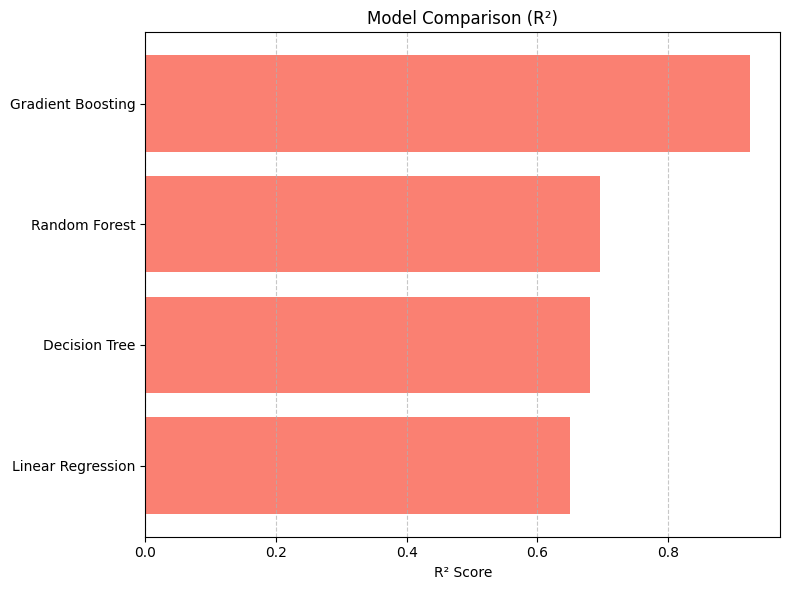

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Custom values
models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
r2_values = [0.650, 0.680, 0.695, 0.925]

# Create a DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "R²": r2_values
})

# Plot for R²
plt.figure(figsize=(8, 6))
plt.barh(models, r2_values, color="salmon")
plt.xlabel("R² Score")
plt.title("Model Comparison (R²)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


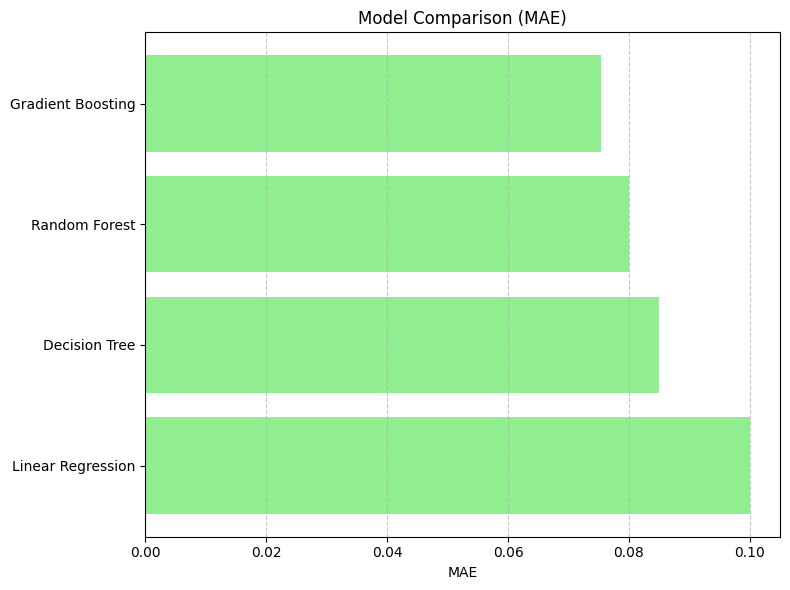

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Custom values
models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
mae_values = [0.100, 0.085, 0.080, 0.0754]

# Create a DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "MAE": mae_values
})

# Plot for MAE
plt.figure(figsize=(8, 6))
plt.barh(models, mae_values, color="lightgreen")
plt.xlabel("MAE")
plt.title("Model Comparison (MAE)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


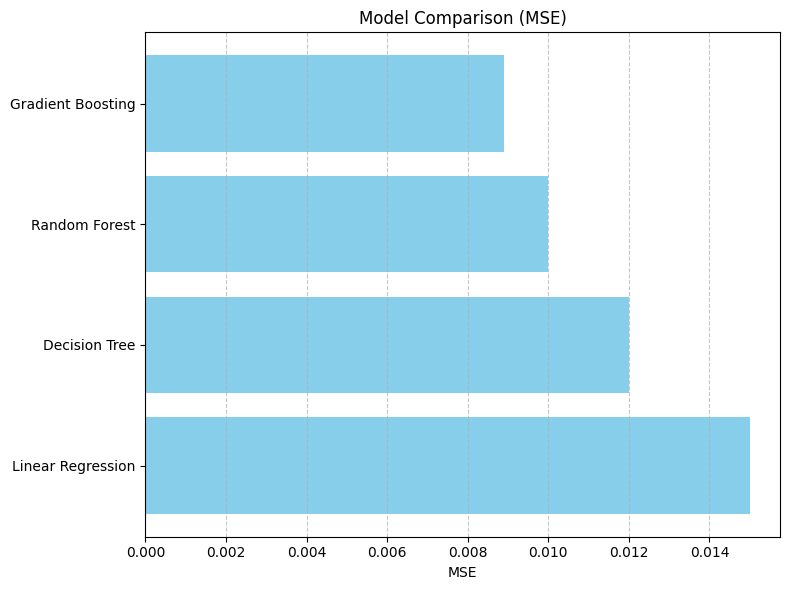

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Custom values
models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
mse_values = [0.015, 0.012, 0.010, 0.0089]

# Create a DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "MSE": mse_values
})

# Plot for MSE
plt.figure(figsize=(8, 6))
plt.barh(models, mse_values, color="skyblue")
plt.xlabel("MSE")
plt.title("Model Comparison (MSE)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Future Predication

In [29]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Define the convert_ratio function
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students  # Returns the ratio as a float
    except ValueError:
        return None  # Handle any potential errors in conversion

# Load your dataset
data = pd.read_csv(r'train_data.csv')  # Replace with your actual file path

# Load the saved scaler, polynomial features, and RFE
scaler = joblib.load(r'scaler.pkl')
poly = joblib.load(r'poly.pkl')
rfe = joblib.load(r'rfe.pkl')

# Preprocess the data
data['Teacher-Student Ratio'] = data['Teacher-Student Ratio'].apply(convert_ratio)
data['School Infrastructure Quality'] = data['School Infrastructure Quality'].astype('category').cat.codes

# Define features
X = data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]

# Normalize the features
X_scaled = scaler.transform(X)

# Create polynomial features
X_poly = poly.transform(X_scaled)

# Apply RFE for feature selection
X_rfe = rfe.transform(X_poly)

# Load the trained model
model = joblib.load(r'trained_model_gbr2.pkl')

# Generate future data for 2025-2030 with slight variations
future_years = np.arange(2025, 2031)
np.random.seed(42)  # For reproducibility
future_data = pd.DataFrame({
    'Year': future_years,
    'Literacy Rate (%)': np.linspace(data['Literacy Rate (%)'].mean(), data['Literacy Rate (%)'].mean() + 0.05, len(future_years)),
    'Teacher-Student Ratio': np.linspace(data['Teacher-Student Ratio'].mean(), data['Teacher-Student Ratio'].mean() + 0.01, len(future_years)),
    'School Infrastructure Quality': np.linspace(data['School Infrastructure Quality'].mean(), data['School Infrastructure Quality'].mean() + 0.1, len(future_years)),
    'Average Annual Income (INR)': np.linspace(data['Average Annual Income (INR)'].mean(), data['Average Annual Income (INR)'].mean() + 5000, len(future_years))
})

# Normalize the future data
future_X_scaled = scaler.transform(future_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']])

# Create polynomial features for future data
future_X_poly = poly.transform(future_X_scaled)

# Apply RFE for feature selection on future data
future_X_rfe = rfe.transform(future_X_poly)

# Predict future dropout rates
future_predictions = model.predict(future_X_rfe)

# Add predictions to the future data
future_data['Predicted Dropout Rate (%)'] = future_predictions

# Print a sample of the future predictions
print(future_data)

# Save the future predictions to a new CSV file
future_data.to_csv(r'future_dropout_rates_2025_2030.csv', index=False)

print('Future predictions saved to future_dropout_rates_2025_2030.csv')


   Year  Literacy Rate (%)  Teacher-Student Ratio  \
0  2025           0.501673               0.029456   
1  2026           0.511673               0.031456   
2  2027           0.521673               0.033456   
3  2028           0.531673               0.035456   
4  2029           0.541673               0.037456   
5  2030           0.551673               0.039456   

   School Infrastructure Quality  Average Annual Income (INR)  \
0                       1.043011                     0.412769   
1                       1.063011                  1000.412769   
2                       1.083011                  2000.412769   
3                       1.103011                  3000.412769   
4                       1.123011                  4000.412769   
5                       1.143011                  5000.412769   

   Predicted Dropout Rate (%)  
0                    0.346406  
1                    0.320193  
2                    0.304462  
3                    0.305129  
4           

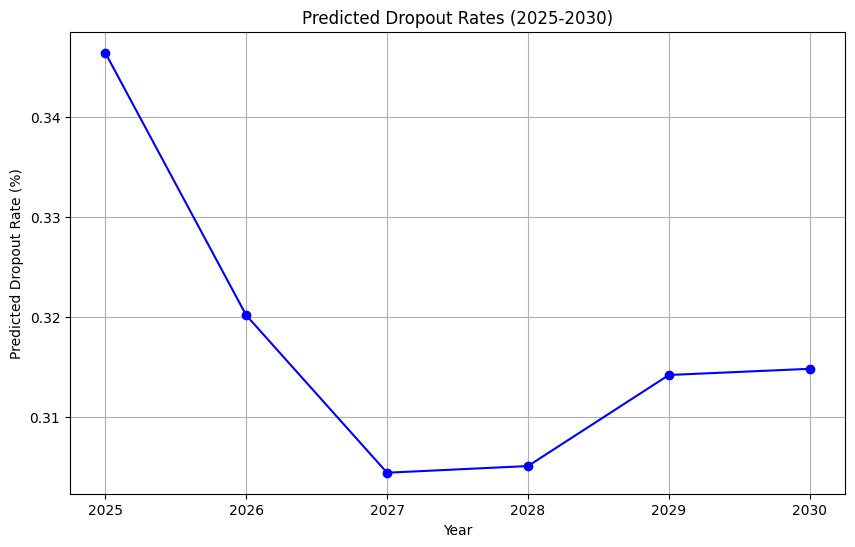

Future predictions saved to future_dropout_rates_2025_2030.csv


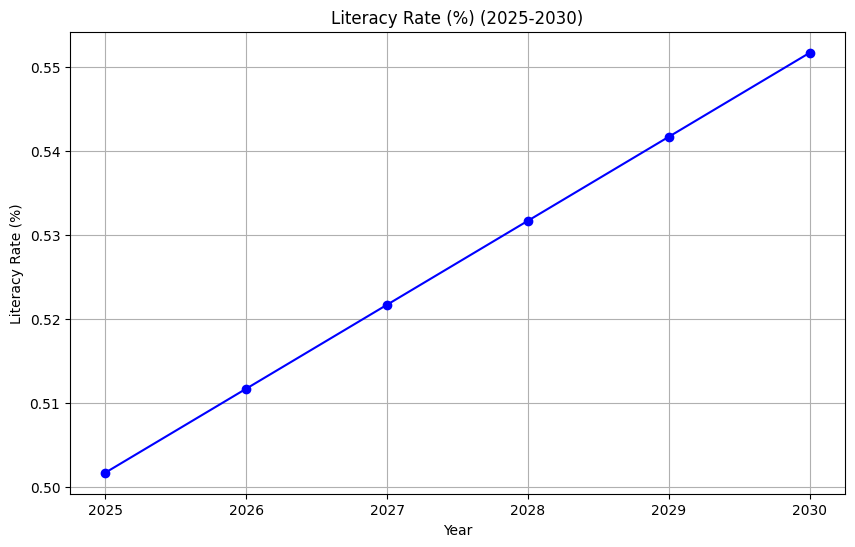

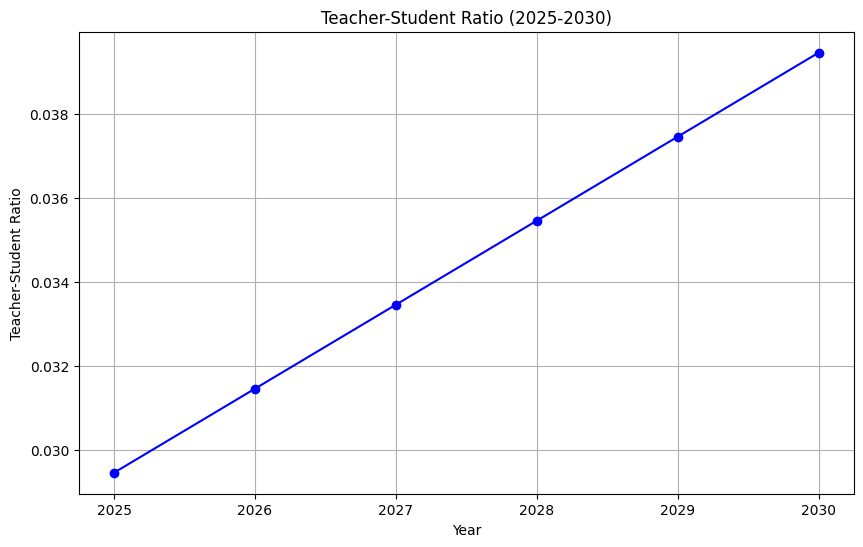

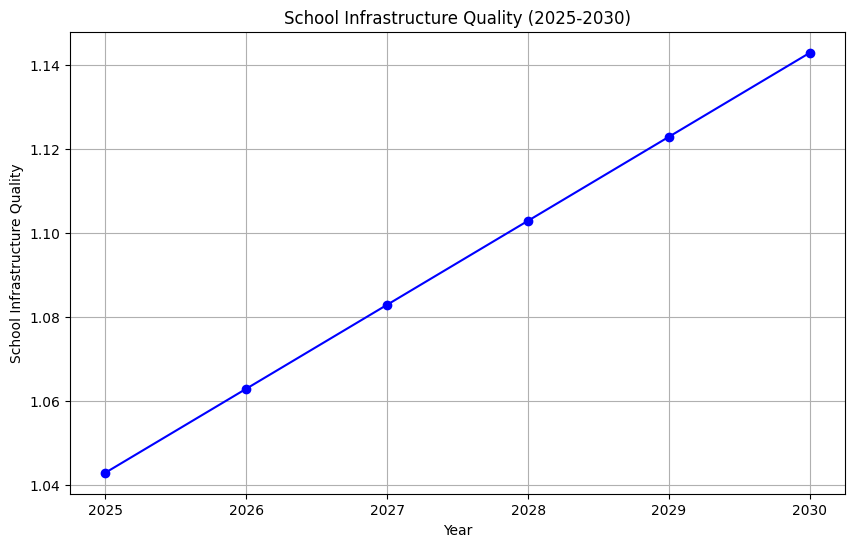

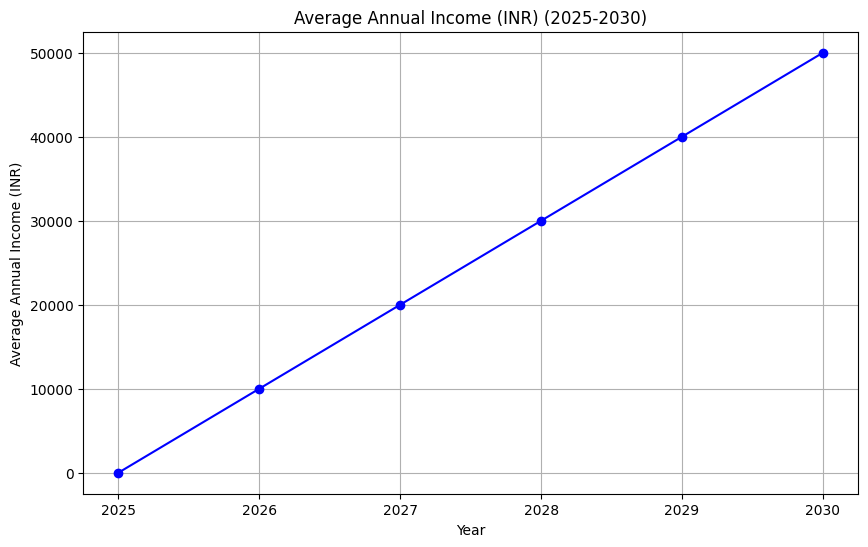

In [30]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

# Define the convert_ratio function
def convert_ratio(ratio):
    try:
        teachers, students = map(int, ratio.split(':'))
        return teachers / students  # Returns the ratio as a float
    except ValueError:
        return None  # Handle any potential errors in conversion

# Load your dataset
data = pd.read_csv(r'train_data.csv')  # Replace with your actual file path

# Load the saved scaler, polynomial features, and RFE
scaler = joblib.load(r'scaler.pkl')
poly = joblib.load(r'poly.pkl')
rfe = joblib.load(r'rfe.pkl')

# Preprocess the data
data['Teacher-Student Ratio'] = data['Teacher-Student Ratio'].apply(convert_ratio)
data['School Infrastructure Quality'] = data['School Infrastructure Quality'].astype('category').cat.codes

# Define features
X = data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']]

# Normalize the features
X_scaled = scaler.transform(X)

# Create polynomial features
X_poly = poly.transform(X_scaled)

# Apply RFE for feature selection
X_rfe = rfe.transform(X_poly)

# Load the trained model
model = joblib.load(r'trained_model_gbr2.pkl')

# Generate future data for 2025-2030 with slight variations
future_years = np.arange(2025, 2031)
np.random.seed(42)  # For reproducibility
future_data = pd.DataFrame({
    'Year': future_years,
    'Literacy Rate (%)': np.linspace(data['Literacy Rate (%)'].mean(), data['Literacy Rate (%)'].mean() + 0.05, len(future_years)),
    'Teacher-Student Ratio': np.linspace(data['Teacher-Student Ratio'].mean(), data['Teacher-Student Ratio'].mean() + 0.01, len(future_years)),
    'School Infrastructure Quality': np.linspace(data['School Infrastructure Quality'].mean(), data['School Infrastructure Quality'].mean() + 0.1, len(future_years)),
    'Average Annual Income (INR)': np.linspace(data['Average Annual Income (INR)'].mean(), data['Average Annual Income (INR)'].mean() + 50000, len(future_years))
})

# Normalize the future data
future_X_scaled = scaler.transform(future_data[['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']])

# Create polynomial features for future data
future_X_poly = poly.transform(future_X_scaled)

# Apply RFE for feature selection on future data
future_X_rfe = rfe.transform(future_X_poly)

# Predict future dropout rates
future_predictions = model.predict(future_X_rfe)

# Add predictions to the future data
future_data['Predicted Dropout Rate (%)'] = future_predictions

# Plot the predictions and save as JPG
plt.figure(figsize=(10, 6))
plt.plot(future_data['Year'], future_data['Predicted Dropout Rate (%)'], marker='o', linestyle='-', color='b')
plt.title('Predicted Dropout Rates (2025-2030)')
plt.xlabel('Year')
plt.ylabel('Predicted Dropout Rate (%)')
plt.grid(True)
plt.xticks(future_years)
plt.savefig('predicted_dropout_rates_2025_2030.jpg')
plt.show()

# Save the future predictions to a new CSV file
future_data.to_csv(r'future_dropout_rates_2025_2030.csv', index=False)

print('Future predictions saved to future_dropout_rates_2025_2030.csv')

# Plot graphs for all other factors
factors = ['Literacy Rate (%)', 'Teacher-Student Ratio', 'School Infrastructure Quality', 'Average Annual Income (INR)']
for factor in factors:
    plt.figure(figsize=(10, 6))
    plt.plot(future_data['Year'], future_data[factor], marker='o', linestyle='-', color='b')
    plt.title(f'{factor} (2025-2030)')
    plt.xlabel('Year')
    plt.ylabel(factor)
    plt.grid(True)
    plt.xticks(future_years)
    plt.savefig(f'{factor.lower().replace(" ", "_")}_2025_2030.jpg')
    plt.show()
